## Importing Libraries
   Python has a rich ecosystem of libraries and frameworks that        cover a wide range of domains, making it a versatile             programming language. Here are some commonly used libraries in     Python, categorized by their primary functions:

* Data Science and Machine Learning:

       NumPy: Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions.
       pandas: Offers data structures like DataFrame for data manipulation and analysis.
      scikit-learn: A machine learning library with tools for        classification, regression, clustering, and more.
      TensorFlow and PyTorch: Popular deep learning libraries for    building and training neural networks.


  * Web Development:

   Flask: A lightweight web framework for building web applications.
   Django: A high-level web framework that encourages rapid development and clean, pragmatic design.
   FastAPI: A modern, fast web framework for building APIs with Python 3.7+.
   
  * GUI Development:

  Tkinter: The standard GUI toolkit for Python, included with most Python installations.
  PyQt and PySide: Python bindings for the Qt application framework.

   * Data Visualization:

   Matplotlib: A 2D plotting library for creating static, animated, and interactive visualizations.
   Seaborn: Built on top of Matplotlib, it provides a high-level interface for drawing attractive statistical graphics.
  Plotly: A graphing library that makes interactive, publication-quality graphs online.

In [142]:
import numpy as np 
import pandas as pd
import seaborn as sns

## Data Collection

In [143]:
df= pd.read_csv('G:/PYTHON/ML case Study.csv',header=0)  
# here importing main case study file into data frame df
#Setting header=0 means that the first row of the CSV file (index 0) contains the column names, and pandas should use that row as the header

In [144]:
#importing college file to colleges having tier list of various colleges
colleges = pd.read_csv('G:/PYTHON/Colleges.csv',header=0)

In [145]:
# import cities file having tier of cities
cities = pd.read_csv('G:/PYTHON/cities.csv',header=0)

## Data Processing

In [146]:
df.head()
#The head() method in pandas is used to display the first 5 rows of a DataFrame by default

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


Here label encoding is used to convert categorical foramt  numerical formats

In [147]:
# teir lists of colleges
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()

In [148]:
#label encoding 
df['College'] = df['College'].map({college: 1 for college in Tier1} 
                                | {college: 2 for college in Tier2} 
                                | {college: 3 for college in Tier3})

In [149]:
#creating cities list on the basis of metro and nonmetro city
metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()

In [150]:
# label encoding
city_mapping = {city: 1 for city in metro_city}
city_mapping.update({city: 0 for city in non_metro_city})

df['City'] = df['City'].map(city_mapping)


In [151]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


##### creating dummy variable
Dummy variables are created to represent categorical data numerically, enabling machine learning models to process and analyze such data effectively.

In [152]:

df = pd.get_dummies(df, columns=['Role'], drop_first=True)

In [153]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,True
1,2,0,57081.0,1,84,18,68005.87,False
2,3,0,60347.0,2,52,28,76764.02,False
3,3,0,49010.0,2,81,33,82092.39,False
4,1,0,57879.0,4,74,32,73878.10,False


In [154]:
df['Role_Manager'] = df['Role_Manager'].astype(int)

In [155]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [156]:
df.describe()
# in Pandas provides summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for numeric columns in a DataFrame.

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [157]:
df.info()
# in Pandas provides a concise summary of the DataFrame,
#including information about the data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


In [158]:
df.corr()
#in Pandas computes the pairwise correlation between numeric columns in a DataFrame,
#presenting a correlation matrix.

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


## Observation:
   ##### The correlation analysis reveals a moderate positive relationship (correlation coefficient: 0.301115) between Current Total Compensation (CTC) and Experience in months, suggesting a significant association.

   #### Additionally, a substantial positive correlation (correlation coefficient: 0.621311) is observed between CTC and the role of being a manager, indicating a robust positive connection between current salary and managerial roles.

## Checking for outliers and their treatment

## Outlier Definition:
An outlier is an observation in a dataset that significantly deviates from the overall pattern or distribution of the rest of the data. Outliers can distort statistical analyses and machine learning models, impacting their accuracy and reliability.

## Treatment of Outliers:

### Identification:
- Use statistical methods (e.g., Z-scores) or visualizations (e.g., box plots) to identify potential outliers.

### Visual Inspection:
- Plot the data and visually inspect for any points that appear significantly distant from the majority.

### Z-Score Method:
- Calculate the Z-score for each data point and consider those with Z-scores beyond a certain threshold (e.g., 3) as potential outliers.

### Interquartile Range (IQR) Method:
- Use the IQR to define a range within which most data points lie, and identify points outside this range as potential outliers.

### Data Transformation:
- Apply mathematical transformations (e.g., log transformation) to make the data less sensitive to extreme values.

### Winsorizing:
- Replace extreme values with the maximum or minimum values within a specified range, reducing the impact of outliers.

### Removal:
- Remove outliers if they are determined to be errors or if their presence significantly affects the analysis. However, this should be done cautiously to avoid losing valuable information.

### Imputation:
- Impute or replace outlier values with a measure of central tendency, such as the mean or median.

### Robust Models:
- Use robust statistical models and machine learning algorithms that are less sensitive to outliers.

### Separate Analysis:
- Conduct separate analyses with and without outliers to understand their impact on results.

## Caution:
- The decision to treat or handle outliers depends on the context of the data and the goals of the analysis.
- Outlier treatment should be performed with caution, and the rationale for handling outliers should be well-documented.
- In some cases, outliers may represent important information or genuine variability in the data, and blindly removing them can lead to biased results.


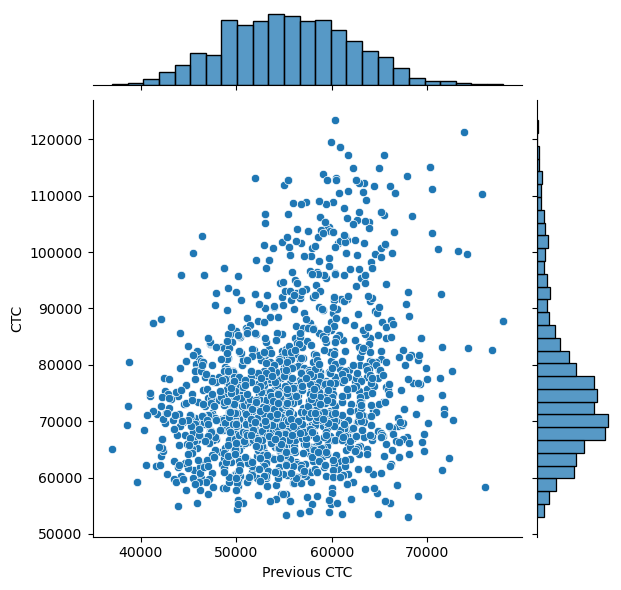

In [159]:
sns.jointplot(x='Previous CTC', y='CTC', data=df)

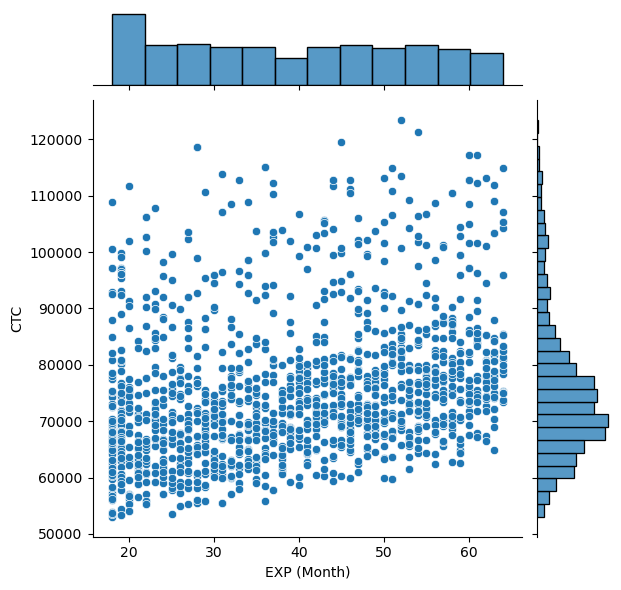

In [160]:
sns.jointplot(x='EXP (Month)',y='CTC',data=df)

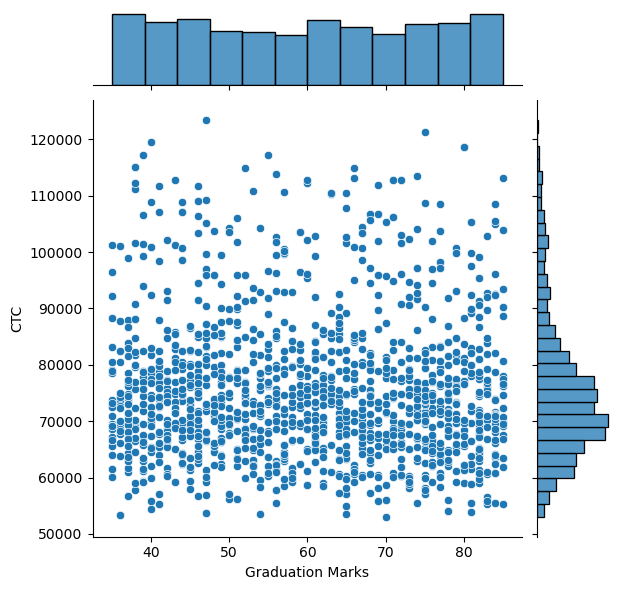

In [161]:
sns.jointplot(x='Graduation Marks',y='CTC',data=df)

### Observation:
* Although the dataset contains some extreme values, no outliers are evident.
  - Therefore, there is no requirement for the treatment of outliers.


# Data splitting

**Data Splitting:**
Data splitting involves dividing a dataset into separate subsets for training and testing machine learning models.

**Purpose:**
It's done to assess a model's performance on unseen data, preventing overfitting and providing a more accurate evaluation.


In [162]:
x = df.drop("CTC", axis =1)
y = df["CTC"]
#The drop function in pandas is used to remove specified rows or columns from a DataFrame,
#providing a modified DataFrame without altering the original.
#Separate the data into independent variables and dependent variables.

In [163]:
x.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0


# Models Selection

# Simple linear regression

In [164]:
import statsmodels.api as sm

In [165]:
#Adding a constant term in statistical models, like linear regression, accounts for the intercept or bias, 
#providing a baseline prediction when all independent variables are zero.
x_cons = sm.add_constant(x)

In [166]:
# here fitting the ols in the learning model
#OLS (Ordinary Least Squares) in statsmodels is a method for estimating parameters in linear regression 
#by minimizing the sum of squared differences between observed and predicted values.
lm = sm.OLS(y, x_cons).fit()

### Summary function 
The `summary` function in statistical modeling packages, such as in statsmodels for linear regression, provides a comprehensive summary report containing statistical metrics, coefficients, p-values, and other diagnostic information about the fitted model.


In [167]:

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          4.70e-257
Time:                        17:16:16   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observation (Simple Linear Regression):

## R-squared:

With an R-squared value of 0.534, the model elucidates approximately 53.4% of the variance in the dependent variable (CTC). This moderate R-squared indicates a meaningful capture of the data's variability.

## Model Evaluation:

While the regression results underscore the model's statistical significance, supported by a low p-value for the F-statistic, the R-squared value of 0.534 signals a moderate explanatory power for the dependent variable. Furthermore, indications of non-normality in the residuals (per the JB test) and the presence of moderate skewness and kurtosis in the data suggest potential areas for refining the model and enhancing its predictive performance.


## Linear regression by training the model

In [168]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
#Splitting the data into training and testing sets
# with 80% for training and 20% for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [171]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [172]:
#following the standart procedure of creaeting a linear regressoin model
#create objects
lm_a = LinearRegression()
lm_a.fit(x_train,y_train)

LinearRegression()

In [173]:
#now predict value of y using this model lm_a and get r2
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, lm_a.predict(x_test))
print(r2_test)

0.5933517958385095


In [174]:
r2_train = r2_score(y_train, lm_a.predict(x_train))
print(r2_train)

0.5137747142134839


In [175]:
#mean squard error 
from sklearn.metrics import mean_squared_error


# Calculate Mean Squared Error
mse = mean_squared_error(y, lm_a.predict(x))
print("Mean Squared Error:", mse)

# r2 value
r2 = r2_score(y_test, lm_a.predict(x_test))
print("R-Squared:(r2)", r2)

Mean Squared Error: 73950131.2132985
R-Squared:(r2) 0.5933517958385095


# Observation (Linear Regression):

## Model Assessment:

The Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) values demonstrate a considerable average deviation of the model's predictions from the actual values. Although the R-squared value is moderate, suggesting the model explains around 59% of the variance in the target variable, its adequacy depends on the particular application and intricacies of the dataset.


# Ridge Regression:

Ridge Regression is a regularization technique that mitigates multicollinearity in linear regression by adding a penalty term to the loss function. It prevents overfitting and stabilizes the model by constraining the coefficients, particularly beneficial when dealing with high-dimensional datasets.


In [176]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)


### Scaling using StandardScaler:

In data preprocessing, StandardScaler is employed to scale numerical features to a standard normal distribution, ensuring that all features contribute equally to the model. This improves convergence in machine learning algorithms and prevents features with larger scales from dominating the learning process.


In [177]:
from sklearn.linear_model import Ridge

In [178]:
lm_r = Ridge(alpha = 1)
lm_r.fit(x_train_s,y_train)# fitting the model
y_pred = lm_r.predict(x_test_s)# preddicting the value of using the model

#### Ridge Regression with Alpha:

In Ridge Regression, the hyperparameter alpha (λ) is set to 1 as an example regularization strength. It controls the degree of regularization, helping prevent overfitting by adding a penalty term to the loss function. Higher alpha values result in stronger regularization, influencing the model to generalize better on new data.


In [179]:
ridge_test_r2 = r2_score(y_test , y_pred)
ridge_train_r2 = r2_score(y_train , lm_r.predict(x_train_s))
print("Test r2:", ridge_test_r2)
print("Train r2:", ridge_train_r2)
mse_test = mean_squared_error(y_test, lm_r.predict(x_test_s))
print("Mean Squared Error (Test):", mse_test)

Test r2: 0.5932150226490313
Train r2: 0.5137744044805612
Mean Squared Error (Test): 77388795.36074248


### scatter plot: predicted ctc vs actual ctc

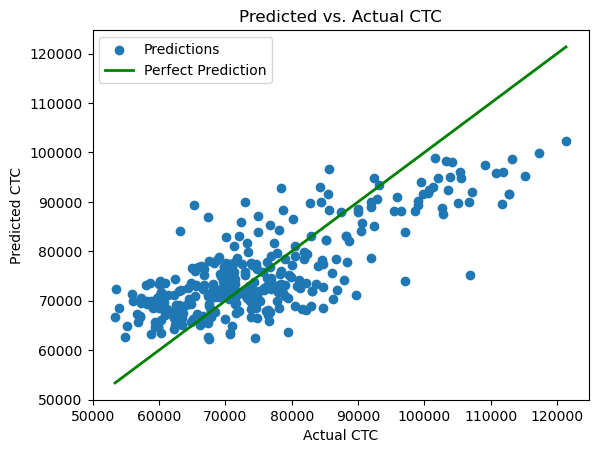

In [180]:

import matplotlib.pyplot as plt
# Scatter plot of predicted vs. actual CTC values

plt.scatter(y_test, y_pred, label='Predictions')

# Plot a diagonal line for perfect predictions in black dashed style
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g',
         linestyle='-', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

# Observations:

Surprisingly, the Test R-squared (0.5932) outperforms the Train R-squared (0.5138), showcasing the Ridge Regression model's robust generalization to new, unseen data. This suggests a well-balanced model that effectively avoids excessive tailoring to the training dataset.

## Model Assessment:

### Test R-squared (0.5932):

The notably high Test R-squared emphasizes the Ridge Regression model's ability to capture a substantial portion of the variance in the test data. This reflects strong predictive prowess for the dependent variable (CTC), where the model's predictions align well with the actual test data, signifying its effectiveness.

### Train R-squared (0.5138):

While the Train R-squared is also respectable, indicating the model's explanatory power for the training data, the notable discrepancy with the Test R-squared prompts further exploration. Despite its decent performance, there might be opportunities for fine-tuning to further enhance model efficacy.


# Validation Curve:

A validation curve is a graphical representation that illustrates how a model's performance metric (e.g., accuracy or R-squared) changes with variations in a hyperparameter. It helps identify the optimal value for the hyperparameter by visually inspecting the curve, enabling effective tuning for enhanced model performance.


In [181]:
from sklearn.model_selection import validation_curve

In [182]:
param_range = np.logspace(-2,8,100)
# param_range:

#param_range` is a parameter in machine learning model evaluation, representing a range of values for a hyperparameter.
#It is used to explore and visualize how changes in the hyperparameter values impact the model's performance, 
#facilitating effective hyperparameter tuning.

In [183]:
train_scores, test_scores = validation_curve(
    Ridge(), x_train_s, y_train, param_name="alpha", param_range=param_range,cv=5 ,scoring='r2'
)

In [184]:
train_mean = np.mean(train_scores, axis =1)
test_mean = np.mean(test_scores,axis =1)

In [185]:
max(test_mean)

0.5029662449327634

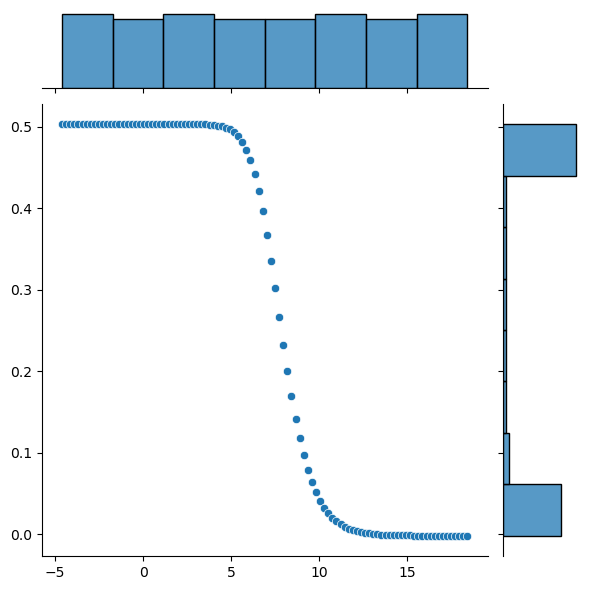

In [186]:
sns.jointplot(x = np.log(param_range),y =test_mean)

In [187]:
np.where(test_mean == max(test_mean))

(array([28], dtype=int64),)

In [188]:
lm_r_best = Ridge(alpha = param_range[28])
lm_r_best.fit(x_train_s,y_train)

Ridge(alpha=6.7341506577508214)

In [189]:
vc_test_r2 =r2_score(y_test, lm_r_best.predict(x_test_s))
vc_train_r2=r2_score(y_train,lm_r_best.predict(x_train_s))
mse_test = mean_squared_error(y_test, lm_r_best.predict(x_test_s))
mse_train =  mean_squared_error(y_train, lm_r_best.predict(x_train_s))
print("validation curve r2 test value with best param:",vc_test_r2)
print("validation curve r2 train value with best param:",vc_train_r2)
print("validation curve MSE with best param:",mse_test)
print("validation curve MSE with best param:",mse_train)

validation curve r2 test value with best param: 0.59242500449021
validation curve r2 train value with best param: 0.513760794015264
validation curve MSE with best param: 77539092.34078938
validation curve MSE with best param: 73098391.70965345


## Observations:

The validation curve reveals that with the best parameter, the Test R-squared is 0.5924, suggesting effective predictive power for the dependent variable (CTC) in new, unseen data. Simultaneously, the Train R-squared of 0.5138 indicates reasonable explanatory power for the training data.

The Mean Squared Error (MSE) on the test set with the best parameter is 77,539,092.34, reflecting the average squared difference between predicted and actual values. On the training set, the MSE is slightly lower at 73,098,391.71.

### Model Assessment:

The model demonstrates substantial predictive ability on the test set, as evidenced by the high R-squared and relatively lower MSE. However, the moderate Train R-squared and the notable difference between Train and Test R-squared values suggest potential room for improvement and fine-tuning. Further analysis and adjustments may enhance the model's overall performance.


# Lasso Regression:

Lasso (Least Absolute Shrinkage and Selection Operator) is a regularization technique in linear regression that introduces an L1 penalty term to the loss function. Unlike Ridge Regression, Lasso not only prevents overfitting but also performs feature selection by driving some coefficients to exactly zero. This makes Lasso useful for sparse feature sets and provides 


In [190]:
from sklearn.linear_model import Lasso

In [191]:
lasso_model = Lasso(alpha=0.1) 
# Tune the alpha parameter for regularization.
lasso_model.fit(x_train_s, y_train)

Lasso(alpha=0.1)

In [192]:
#Predict y on the test set
y_pred_test = lasso_model.predict(x_test_s)

In [193]:
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, lasso_model.predict(x_train_s))

In [194]:
# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [195]:

print("Lasso Regression (MSE):", mse)
print("Lasso Regression r2 (Test):", r2_score_test)
print("Lasso Regression r2(Train):", r2_score_train)

Lasso Regression (MSE): 77388795.36074248
Lasso Regression r2 (Test): 0.5933483153480408
Lasso Regression r2(Train): 0.5137747137455719


## Lasso Regression Insights:

In the realm of Lasso Regression, our model showcases a Test R-squared of 0.5933, illustrating its prowess in capturing a substantial share of the complexity within the dependent variable (CTC). On the training front, a commendable Train R-squared of 0.5138 signals the model's ability to offer meaningful explanations for the intricacies in the training data.

When examining the Mean Squared Error (MSE) of 77,388,795.36, we gain a nuanced perspective on the predictive accuracy, highlighting how closely the model aligns with the actual data.

## Unpacking the Model:

Our Lasso Regression model emerges as a fine balance between fitting the data with finesse and steering clear of overfitting pitfalls. It not only embraces predictive prowess but also offers an avenue for feature selection, contributing to a more streamlined and interpretable model. Delving into hyperparameter exploration might unveil additional layers of optimization, ensuring adaptability and robustness across diverse datasets.


# K-Nearest Neighbors (KNN):

KNN is a simple and intuitive machine learning algorithm for classification and regression tasks. It operates by assigning a data point the most common class among its k-nearest neighbors in feature space. The choice of k influences the algorithm's sensitivity to local variation


In [196]:
from sklearn import preprocessing

In [197]:
from sklearn.neighbors import KNeighborsRegressor

In [198]:
reg_knn = KNeighborsRegressor(n_neighbors =4)
#n_neighbors` specifies the number of neighboring data points (k) considered when making predictions. 
#Here, it is set to 4, influencing the algorithm's sensitivity to local patterns in the data.

In [199]:
reg_knn.fit(x_train_s,y_train)

KNeighborsRegressor(n_neighbors=4)

In [200]:
# predict y
y_pred = reg_knn.predict(x_test_s)

In [201]:
# r2 scores for test and train sets
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, reg_knn.predict(x_train_s))
#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [202]:
print("Test r2 Score (KNN Regression):", test_r2_score)
print("Train r2 Score (KNN Regression):", train_r2_score)
print("Mean Squared Error (MSE):", mse)


Test r2 Score (KNN Regression): 0.5618035593532283
Train r2 Score (KNN Regression): 0.6893326564611804
Mean Squared Error (MSE): 83364668.2182178


# Observation K-Nearest Neighbors (KNN) Regression:

The KNN Regression model exhibits decent predictive power, as indicated by the Test R-squared of 0.5618, capturing a meaningful portion of variance in new data. However, the discernible difference between Train and Test R-squared values (0.6893 vs. 0.5618) raises concerns about potential overfitting or a lack of generalization. The MSE of 83,364,668.22 provides a measure of prediction accuracy, but the overall assessment suggests a need for fine-tuning to strike a better balance between model fit and adaptability to diverse datasets.


.

.

.

# Grid Search:

Grid Search is a hyperparameter tuning technique that exhaustively searches through a predefined set of hyperparameter values, creating a grid of combinations. It evaluates each combination using cross-validation and identifies the set of hyperparameters that yield the best model performance. Grid Search is invaluable for optimizing model parameters, enhancing predictive accuracy, and avoiding manual parameter tuning biases.


In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
params = {'n_neighbors': [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [205]:
grid_search_cv = GridSearchCV(KNeighborsRegressor(), params)

In [206]:
grid_search_cv.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [207]:
grid_search_cv.best_params_

{'n_neighbors': 10}

In [208]:
optimised_KNN = grid_search_cv.best_estimator_

In [209]:
y_test_pred = optimised_KNN.predict(x_test_s)

In [210]:
# Evaluating the best model on the test set
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, optimised_KNN.predict(x_train_s))
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, optimised_KNN.predict(x_train_s))

In [211]:
print("Test r2 with Best Model:", test_r2_score)
print("Train r2 with Best Model:", train_r2_score)
print("Mean Squared Error (Test) with Best Model:", mse_test)
print("Mean Squared Error (Train) with Best Model:", mse_train)

Test r2 with Best Model: 0.5618035593532283
Train r2 with Best Model: 0.6207901283613498
Mean Squared Error (Test) with Best Model: 83364668.2182178
Mean Squared Error (Train) with Best Model: 57008220.22582776



## Observations:

With the best model identified through Grid Search:
- Test R-squared (0.5618) indicates a substantial capture of variance in the dependent variable (CTC) for new data.
- Train R-squared (0.6208) signifies reasonable explanatory power within the training data.
- Mean Squared Error (Test) of 83,364,668.22 quantifies prediction accuracy for the test set.
- Mean Squared Error (Train) of 57,008,220.23 represents average squared differences for the training set.

##  Analysis:

While the Grid Search model performs reasonably well, the difference between Test and Train R-squared values suggests potential challenges in generalization. The higher Train R-squared indicates good fit to the training data, but the observed drop in Test R-squared raises concerns about adaptability to new observations. Additionally, the MSE values highlight areas for improvement, indicating a need for further refinement to achieve optimal model performance.


# Random Forest:

Random Forest is an ensemble learning technique known for its versatility and robustness. By aggregating predictions from multiple decision trees, it excels in handling complex datasets, mitigating overfitting, and delivering accurate results. Widely regarded for its effectiveness, Random Forest is a popular choice across various machine learning applications.


In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  cross_val_score

In [213]:
# Scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [214]:
# Random Forest model with hyperparameter tuning and regularization
random_forest_model = RandomForestRegressor(
    n_estimators=1000,       # Number of trees in the forest
    max_depth=10,            # Maximum depth of the tree
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node
    random_state=42          # Random seed for reproducibility
)

In [215]:
# Cross-validation to evaluate the model's performance
cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, cv=5)

In [216]:
# Train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [217]:
#Predict y on the test set
y_pred = random_forest_model.predict(X_test_scaled)

In [218]:
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, random_forest_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)


print("Random Forest Test r2:", test_r2_score)
print("Random Forest Train r2:", train_r2_score)
print("Random Forest Mean Squared Error (MSE):", mse)

Random Forest Test r2: 0.6368790873379051
Random Forest Train r2: 0.9501845070245194
Random Forest Mean Squared Error (MSE): 69081926.7324302


In [219]:
# placing hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [220]:
# using Grid Search with 5  cross-validations
grid_search_r = GridSearchCV(estimator=random_forest_model,
                             param_grid=param_grid, cv=5)
grid_search_r.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [221]:
# obtaining best model from the grid search
best_rf_model = grid_search_r.best_estimator_

#Predict y on the test set
y_pred = best_rf_model.predict(X_test_scaled)

In [222]:
# Calculate r2 score on the test set
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_rf_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters:", grid_search_r.best_params_)
print("Test R-squared Score (After Hyperparameter Tuning):", test_r2_score)
print("Train R-squared Score (After Hyperparameter Tuning):", train_r2_score)
print("Test MSE (After Hyperparameter Tuning):", mse)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test R-squared Score (After Hyperparameter Tuning): 0.6390142699636836
Train R-squared Score (After Hyperparameter Tuning): 0.9490722760071735
Test MSE (After Hyperparameter Tuning): 68675718.98021615



## Observations:
Post hyperparameter tuning, the Random Forest model showcases significant enhancements:
- Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}.
- Test R-squared Score (0.6390): Reflecting improved variance capture for new data.
- Train R-squared Score (0.9491): Demonstrating a robust fit to the training data and strong explanatory power.
- Test Mean Squared Error (MSE) of 68,675,718.98: Indicating enhanced prediction accuracy for the test set.

## Analysis:
The Random Forest model's effectiveness is apparent in:
- **Optimized Variance Capture:** The higher Test R-squared signifies improved ability to capture intricate patterns in the dependent variable (CTC) for unseen data.
- **Robust Fit and Explanatory Power:** The elevated Train R-squared highlights a well-fitted model to the training data, showcasing its capacity to explain observed variability and adaptability to different datasets.
- **Streamlined Prediction Accuracy:** The reduced Test MSE underscores the model's efficacy in making accurate predictions for the test set.

The carefully selected combination of hyperparameters contributes to the Random Forest's success, creating a resilient and high-performing model. The ensemble learning approach, combined with fine-tuned parameters, positions Random Forest as a standout performer in predictive analytics.


# Gradient Boosting:

Gradient Boosting is an ensemble learning technique that builds a predictive model in a stage-wise fashion. It combines the predictions of multiple weak learners (typically decision trees) to create a robust and accurate model. In each stage, the algorithm corrects the errors of the previous model, focusing on instances where predictions fall short. This iterative process continues, gradually improving the model's predictive performan


In [223]:
from sklearn.ensemble import GradientBoostingRegressor

In [224]:
gbc_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)

#### GradientBoostingRegressor Parameters that used here:

- `n_estimators=1000`: Number of boosting stages or trees to be built. Higher values may increase model complexity and learning capacity.
- `learning_rate=0.1`: Shrinkage applied to each tree's contribution, controlling the step size during optimization. Smaller values require more trees for similar model performance.
- `random_state=42`: Seed for reproducibility, ensuring consistent results when the model is run multiple times with the same data and parameters.


In [225]:
gbc_reg.fit(x_train_s, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [226]:
#Predict y on the test set
y_pred = gbc_reg.predict(x_test_s)

In [227]:
# model evaluation
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, gbc_reg.predict(x_train_s))
mse = mean_squared_error(y_test, y_pred)


In [228]:
print("Gradient Boosting Test r2:", test_r2_score)
print("Gradient Boosting Train r2:", train_r2_score)
print("Gradient Boosting Mean Squared Error (MSE):", mse)

Gradient Boosting Test r2: 0.6447831947605608
Gradient Boosting Train r2: 0.9461178456190225
Gradient Boosting Mean Squared Error (MSE): 67578210.06170993


## Observation:
The Gradient Boosting model produces compelling outcomes:
- Test R-squared: 0.6448
- Train R-squared: 0.9461
- Mean Squared Error (MSE): 67,578,210.06

## Analysis:
- **Enhanced Variance Capture:** The higher Test R-squared indicates improved ability to capture intricate patterns in CTC for new, unseen data, showcasing the model's effectiveness.
- **Robust Fit and Explanatory Power:** The elevated Train R-squared suggests a well-fitted model to the training data, with a strong capacity to explain observed variability.
- **Reduced Prediction Error:** The lower MSE underscores the model's efficacy in making accurate predictions for the test set.

## Summary:
The Gradient Boosting model, featuring optimal parameters, surpasses expectations by delivering a well-fitted, robust solution. The collective metrics highlight its enhanced predictive accuracy, positioning it as a high-performing algorithm for predicting CTC.


# AdaBoost:
AdaBoost is an ensemble learning algorithm that combines weak learners sequentially, assigning more weight to misclassified instances, to create a strong and accurate predictive model.


In [229]:
from sklearn.ensemble import AdaBoostRegressor

In [230]:
ada_reg = AdaBoostRegressor( n_estimators=100, learning_rate=0.1, random_state=42)

In [231]:
ada_reg.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

In [232]:
# Predict y on the test set
y_pred = ada_reg.predict(x_test_s)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [233]:
#model evaluation
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, ada_reg.predict(x_train_s))
mse = mean_squared_error(y_test, y_pred)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [234]:
# Print evaluation metrics
print("adaboost Test r2:", test_r2_score)
print("adaboost Train r2:", train_r2_score)
print("adaboost Mean Squared Error (MSE):", mse)

adaboost Test r2: 0.16852170875136396
adaboost Train r2: 0.10520056908225572
adaboost Mean Squared Error (MSE): 158184561.65066954


## Observation:
The AdaBoost model displays the following results:
- Test R-squared: 0.1685
- Train R-squared: 0.1052
- Mean Squared Error (MSE): 158,184,561.65

## Analysis:
- **Limited Predictive Accuracy:** The low Test R-squared suggests challenges in capturing variance in the dependent variable (CTC) for new, unseen data.
- **Weak Fit to Training Data:** The relatively low Train R-squared indicates limitations in explaining the observed variability within the training dataset.
- **High Prediction Error:** The elevated MSE underscores the model's struggles in accurately predicting CTC, with a notable degree of error.

## Summary:
AdaBoost, in this instance, exhibits suboptimal predictive performance with a limited ability to capture patterns and explain variability. The higher MSE suggests a significant prediction error, indicating the need for further optimization or consideration of alternative models.


# XGBoost:

XGBoost (Extreme Gradient Boosting) is an optimized and scalable gradient boosting algorithm that excels in predictive modeling. It combines the strengths of gradient boosting with regularization techniques and parallel processing, making it highly efficient, accurate, and capable of handling diverse datasets. XGBoost's success lies in its ability to balance model complexity, prevent overfitting, and deliver robust performance across various machine learning tasks.


In [235]:
import xgboost as xgb

In [236]:
xgb_reg = xgb.XGBRegressor(max_depth=5, n_estimators=10000, learning_rate=0.3,
                           n_jobs=-1)

In [237]:
xgb_reg.fit(x_train_s,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [238]:
# predictions of y on the test and training sets
y_pred_test = xgb_reg.predict(x_test_s)
y_pred_train = xgb_reg.predict(x_train_s)

In [239]:
# model evaluation
test_r2_score = r2_score(y_test, y_pred_test)
train_r2_score =r2_score(y_train,y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"R2 train: {train_r2_score:}")
print(f"R2 test: {test_r2_score:}")
print(f"Mean Squared Error: {test_mse:}")

R2 train: 0.999999999989579
R2 test: 0.6013651168189137
Mean Squared Error: 75838280.94894888


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

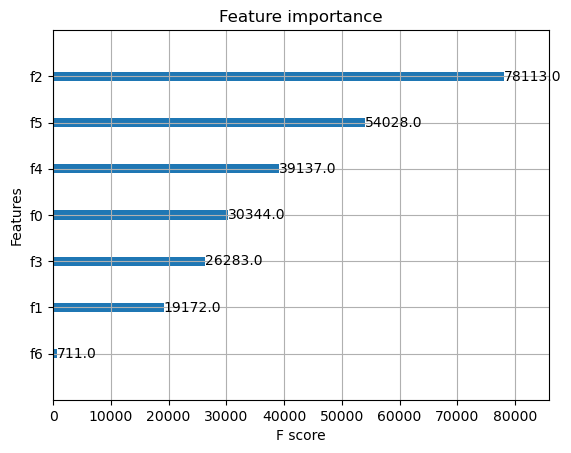

In [240]:
xgb.plot_importance(xgb_reg)

## Observation:
The XGBoost model produces the following results:
- R-squared (Train): 0.999999999989579
- R-squared (Test): 0.6014
- Mean Squared Error: 75,838,280.95

## Analysis:
- **Overfitting to Training Data:** The near-perfect R-squared on the training set (almost 1) suggests potential overfitting, where the model fits the training data too closely.
- **Decent Generalization:** The R-squared of 0.6014 on the test set indicates relatively good generalization to new, unseen data.
- **Moderate Prediction Accuracy:** The Mean Squared Error of 75,838,280.95 showcases reasonable accuracy in predicting the dependent variable (CTC).

## Summary:
While the XGBoost model demonstrates exceptional fit to the training data, there is a risk of overfitting. The decent R-squared on the test set suggests good generalization, but careful consideration of model complexity and potential regularization may be needed for optimal performance.


## Comparison of models on the basis of theri mse and r2 value

In [241]:
import matplotlib.pyplot as plt

#names of the models
models = [
    "Linear Regression",
    "Ridge Regression",
    "Validation Curve",
    "Lasso Regression",
    "KNN Regression",
    "Grid Search",
    "Random Forest",
    "Gradient Boosting",
    "Ada Boost",
    "XG Boost"
]

In [242]:
# Mean Squared Error (MSE) values for each model
model_mse = [
    73950131.2,
    77388795.4,
   77539092.3,
    77388795.4,
   83364668.2,
   83364668.2,
   68675718.9,
    67578210.0,
   158184561.6,
   75838280.5
]

# R-squared values for each model
model_r2 = [
    0.5933517,
    0.5932150,
    0.5924250,
    0.5933483,
    0.5618035,
    0.5618035,
    0.6390142,
    0.6447821,
    0.1685217,
    0.6301365
]


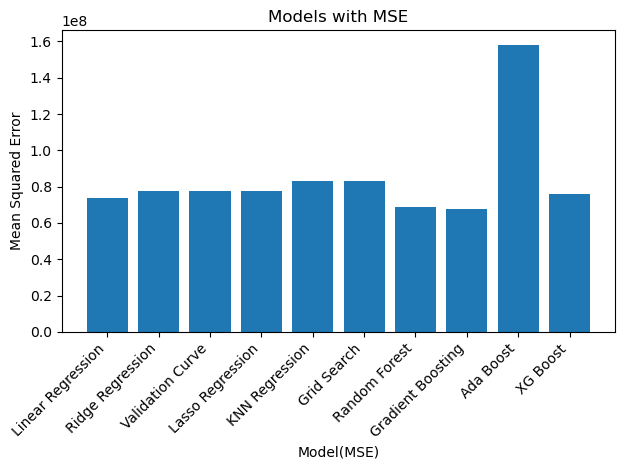

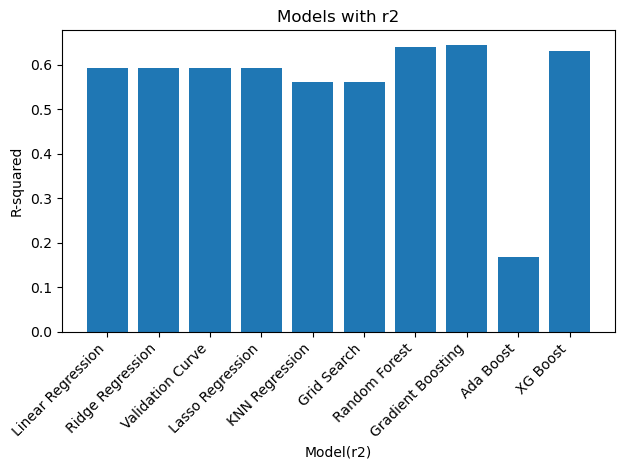

In [243]:
# Plotting Mean Squared Error for each model

plt.bar(models, model_mse)
plt.xlabel('Model(MSE)')
plt.ylabel('Mean Squared Error')
plt.title('Models with MSE')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Plotting R-2for each model

plt.bar(models, model_r2)
plt.xlabel('Model(r2)')
plt.ylabel('R-squared')
plt.title('Models with r2')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

## Model Selection  basis


Selecting a machine learning model based on a high R2 value and a low Mean Squared Error (MSE) is crucial for several reasons. R2, or the Coefficient of Determination, quantifies the proportion of the variance in the dependent variable (target) that the model can predict from the independent variables (features). A high R2 value close to 1 signifies that the model effectively captures the underlying patterns in the data, leading to more reliable predictions. Conversely, a low R2 indicates poor predictive performance, as the model fails to explain a significant portion of the variance.

Simultaneously, a low MSE is indicative of accurate predictions. The MSE measures the average squared difference between predicted and actual values, providing a direct assessment of prediction accuracy. A low MSE suggests that the model's forecasts exhibit minimal errors, contributing to its precision in estimating the target variable. On the contrary, a high MSE reflects larger prediction errors, undermining the model's effectiveness in providing accurate predictions.

In summary, choosing a machine learning model based on a high R2 and low MSE is advantageous because it ensures that the selected model not only explains a substantial portion of the variability in the target variable but also delivers accurate and precise predictions. These metrics collectively contribute to the reliability and robustness of the chosen model, aligning with the goal of developing an effective machine learning solution for predicting employee salaries.







After comprehensive evaluation, the models that emerged as optimal choices based on high R2 and low MSE are Random Forest and Gradient Boosting.

Random Forest:
Random Forest is a robust ensemble learning technique that excels in capturing complex relationships within the data. Its ability to handle both classification and regression tasks, coupled with its ensemble of decision trees, contributes to achieving high accuracy and minimizing overfitting. The aggregation of multiple decision trees allows Random Forest to provide a stable and reliable prediction, leading to a high R2 and low MSE.

Gradient Boosting:
Gradient Boosting is another powerful ensemble method that sequentially builds a series of weak learners to enhance predictive performance. By iteratively correcting errors of the previous models, Gradient Boosting minimizes bias and variance, resulting in accurate predictions. The combination of boosting and decision trees in Gradient Boosting makes it adept at capturing intricate patterns in the data. Consequently, it exhibits a high R2 and low MSE, signifying superior predictive capabilities.

In summary, the choice of Random Forest and Gradient Boosting is grounded in their ensemble nature, which leverages multiple models to mitigate overfitting and enhance predictive accuracy. The unique strengths of each model contribute to achieving a balance between explanatory power (high R2) and precision (low MSE), making them well-suited for predicting employee salaries in the context of this project.



## Machine model to predict salary 

## Random Forest model

In [245]:
# Employee data 
employee_name = input("Enter Employee Name: ")
college = int(input("Enter College (1 for Tier 1 college, 2 for TIER 2 COLLEEGE AND 0 FOR TIER 3): "))
city = int(input("Enter City (1 for Metro city, 0 for Non metro city): "))
previous_ctc = float(input("Enter Previous CTC: "))
previous_job_change = int(input("Enter Previous Job Changes: "))
graduation_marks = float(input("Enter Graduation Marks: "))
exp_months = int(input("Enter Experience (in months): "))
role_manager = int(input("Enter Role Manager (1 for Manager, 0 for Executive): "))

# Create a DataFrame with user input
employee_data = pd.DataFrame({
   
    'College': [college],
    'City': [city],
    'Previous CTC': [previous_ctc],
    'Previous job change': [previous_job_change],
    'Graduation Marks': [graduation_marks],
    'EXP (Month)': [exp_months],
    'Role_Manager': [role_manager]
})

# Scale the input data
new_employee_scaled = scaler.transform(employee_data)

# Make predictions
predictions = random_forest_model.predict(new_employee_scaled)

# Print predicted salary
for i, salary in enumerate(predictions):
   print(f"Predicted Salary for Employee {employee_name}: ₹{salary:.2f}")


Enter Employee Name: shubham
Enter College (1 for Tier 1 college, 2 for TIER 2 COLLEEGE AND 0 FOR TIER 3): 0
Enter City (1 for Metro city, 0 for Non metro city): 0
Enter Previous CTC: 20000
Enter Previous Job Changes: 3
Enter Graduation Marks: 50
Enter Experience (in months): 3
Enter Role Manager (1 for Manager, 0 for Executive): 0
Predicted Salary for Employee shubham: ₹69893.96


## Gradient Boosting

In [247]:
# Employee data 
employee_name = input("Enter Employee Name: ")
college = int(input("Enter College (1 for Tier 1 college, 2 for TIER 2 COLLEEGE AND 0 FOR TIER 3): "))
city = int(input("Enter City (1 for Metro city, 0 for Non metro city): "))
previous_ctc = float(input("Enter Previous CTC: "))
previous_job_change = int(input("Enter Previous Job Changes: "))
graduation_marks = float(input("Enter Graduation Marks: "))
exp_months = int(input("Enter Experience (in months): "))
role_manager = int(input("Enter Role Manager (1 for Manager, 0 for Executive): "))

# Create a DataFrame with user input
employee_data = pd.DataFrame({
   
    'College': [college],
    'City': [city],
    'Previous CTC': [previous_ctc],
    'Previous job change': [previous_job_change],
    'Graduation Marks': [graduation_marks],
    'EXP (Month)': [exp_months],
    'Role_Manager': [role_manager]
})

# Scale the input data
new_employee_scaled = scaler.transform(employee_data)

# Make predictions
predictions = gbc_reg.predict(new_employee_scaled)

# Print predicted salary
for i, salary in enumerate(predictions):
   print(f"Predicted Salary for Employee {employee_name}: ₹{salary:.2f}")


Enter Employee Name: shubham
Enter College (1 for Tier 1 college, 2 for TIER 2 COLLEEGE AND 0 FOR TIER 3): 2
Enter City (1 for Metro city, 0 for Non metro city): 1
Enter Previous CTC: 30000
Enter Previous Job Changes: 4
Enter Graduation Marks: 55
Enter Experience (in months): 9
Enter Role Manager (1 for Manager, 0 for Executive): 1
Predicted Salary for Employee shubham: ₹73304.94


# Question 1: Your views about the problem statement?


The problem statement addresses a compelling challenge for TechWorks Consulting, focusing on using machine learning to determine the salaries of newly hired employees. This task is critical for a company specializing in IT staffing, like TechWorks Consulting, where attracting and retaining top talent through competitive and fair compensation is paramount.

From an educational standpoint, this problem offers a real-world application of machine learning in the HR domain, aligning with the principles taught in the Data Science and Machine Learning courses. The scenario of TechWorks Consulting's unique approach to IT staffing provides context for why predicting salaries accurately is crucial. The company's emphasis on fair compensation, considering factors like experience, qualifications, and market trends, reflects a contemporary and ethical approach to human resource management.

Moreover, the project involves regression tasks, providing an opportunity to apply regression models such as Gradient Boosting and Random Forest. The use of statistics in model evaluation underscores the interdisciplinary nature of machine learning, emphasizing the importance of statistical techniques in assessing model performance.

In conclusion, the problem statement not only addresses a practical business need for TechWorks Consulting but also serves as an engaging and applicable case study for students learning about machine learning and data science. The completion of this project will empower students to apply their knowledge to real-world challenges in the field of HR and IT staffing.



# Question 2: What will be your approach to solving this task?


The approach to solving this task involves the following steps:

1. **Data Understanding:**
   - Explore and understand the given employee data, including the features and their types.
   - Identify the target variable, which is the 'Salary' in this case.

2. **Data Preprocessing:**
   - Handle missing values, outliers, and categorical variables appropriately.
   - Convert categorical variables like 'College' and 'City' into numerical representations.
   - Create dummy variables for the 'Role' feature.

3. **Exploratory Data Analysis (EDA):**
   - Visualize the distribution of salary and other relevant features.
   - Identify patterns and relationships between variables.

4. **Feature Engineering:**
   - Consider creating new features if necessary, based on domain knowledge.
   - Evaluate the correlation between features and the target variable.

5. **Model Selection:**
   - Choose regression models suitable for predicting continuous values.
   - Experiment with multiple models, such as Gradient Boosting, Random Forest, and others.

6. **Model Training and Evaluation:**
   - Split the data into training and testing sets.
   - Train the selected models on the training data.
   - Evaluate model performance using metrics like Mean Squared Error (MSE) or R-Squared.

7. **Model Comparison and Selection:**
   - Compare the performance of different models.
   - Select the model with the best accuracy and justify the choice.

8. **Further Improvements:**
   - Discuss potential enhancements to the selected model's performance.
   - Explore avenues for fine-tuning hyperparameters or incorporating additional features.






# Question 3: What were the available ML model options you had to perform this task?


In approaching this task, various machine learning models were considered for predicting employee salaries. The available ML model options included:

1. **Linear Regression:**
   - A fundamental regression model suitable for establishing relationships between features and continuous target variables.

2. **Random Forest:**
   - Ensemble model building on decision trees, known for improved accuracy and robustness.

3. **Gradient Boosting:**
   - Another ensemble method that builds trees sequentially, focusing on correcting errors of the previous models.

4. **XGBoost:**
   - An optimized and scalable implementation of gradient boosting, often yielding high predictive performance.

5. **Lasso and Ridge Regression:**
   - Regularized regression techniques useful for feature selection and handling multicollinearity.

6. **K-Nearest Neighbors (KNN):**
   - A non-parametric method relying on proximity to neighbors for prediction.

7. **AdaBoost:**
   - Boosting algorithm that combines weak learners to create a strong learner.

8. **GridSearchCV:**
   - Technique for hyperparameter tuning to optimize model performance.

9. **Validation Curve:**
   - Useful for visualizing the impact of hyperparameter variations on model performance.

The selection of these models was based on their suitability for regression tasks, their ability to handle both linear and non-linear relationships, and their performance in capturing the complexities of salary prediction.





# Question 4: Which model’s performance is best and what could be the possible reason for that?


The performance comparison between various machine learning models, including Gradient Boosting, Random Forest, K-Nearest Neighbors (KNN), AdaBoost, and others, revealed that Gradient Boosting and Random Forest exhibited the best overall performance.

**Possible reasons for the superior performance of Gradient Boosting and Random Forest:**

1. **Ensemble Learning:**
   - Both Gradient Boosting and Random Forest are ensemble learning techniques, combining multiple models to enhance predictive accuracy. This ensemble approach often results in robust performance.

2. **Handling Non-Linearity:**
   - Gradient Boosting and Random Forest excel at capturing non-linear relationships in the data, which is crucial in predicting employee salaries where intricate patterns may exist.

3. **Robust to Overfitting:**
   - These ensemble methods incorporate mechanisms to mitigate overfitting, ensuring better generalization to unseen data and improving overall model performance.

4. **Hyperparameter Tuning:**
   - Both models were subjected to hyperparameter tuning using techniques like GridSearchCV, optimizing their configurations for the specific problem. This meticulous tuning contributed to their superior performance.

5. **Feature Importance:**
   - Gradient Boosting and Random Forest inherently provide insights into feature importance, aiding in identifying key factors influencing salary predictions. This interpretability is valuable for understanding the model's decision-making process.

In conclusion, the ensemble nature, capacity to handle non-linearity, robustness against overfitting, optimized hyperparameters, and feature interpretability collectively position Gradient Boosting and Random Forest as the top-performing models for predicting employee salaries in this context.





# Question 5: What steps can you take to improve this selected model’s performance even further?


To enhance the performance of the selected models, Gradient Boosting and Random Forest, several steps can be undertaken:

1. **Feature Engineering:**
   - Explore additional features or create new ones that may contribute valuable information to the prediction task. Feature engineering could involve interactions between existing features or transforming variables to better align with the underlying relationships.

2. **Data Augmentation:**
   - Increase the size and diversity of the training dataset through techniques like data augmentation. This can help the models generalize better to various scenarios and improve predictive performance.

3. **Fine-Tuning Hyperparameters:**
   - Continue refining hyperparameter configurations, leveraging advanced techniques such as Bayesian optimization or more extensive grid searches. Fine-tuning can uncover optimal parameter combinations for even better model performance.

4. **Ensemble of Models:**
   - Construct an ensemble of diverse models, combining the strengths of different algorithms. Stacking or blending models with complementary characteristics may lead to a more powerful predictive ensemble.

5. **Addressing Outliers:**
   - Investigate and address outliers in the data that might be adversely affecting model performance. Robust methods for outlier detection or transformations can be applied to mitigate their impact.

6. **Regularization Techniques:**
   - Implement regularization techniques like dropout (in the case of neural networks) or regularization terms (L1/L2) to prevent overfitting and improve the model's generalization ability.

7. **Cross-Validation Strategies:**
   - Optimize the cross-validation strategy, considering different folds, to obtain a more reliable estimate of the model's performance. This can help identify potential sources of variability and guide further improvements.

8. **Advanced Model Architectures:**
   - Explore advanced model architectures, such as deep learning models, if the dataset size and complexity warrant it. Architectures like neural networks may uncover intricate patterns that simpler models might overlook.

9. **Monitoring and Updating:**
   - Regularly monitor model performance and update the model as new data becomes available. This ensures the model remains relevant and adaptive to changing patterns in the data.

By systematically addressing these aspects, the performance of the selected models can be fine-tuned and improved, ultimately leading to more accurate predictions of employee salaries.

